In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# all process 

In [3]:
import sys
print(sys.executable)


C:\Users\14AC0036AU\AppData\Local\Programs\Python\Python310\python.exe


In [4]:
!{sys.executable} -m pip install scikit-learn


     -------------------------------------- 11.1/11.1 MB 843.2 kB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 41.3/41.3 MB 933.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: C:\Users\14AC0036AU\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [7]:
# Load the dataset
df = pd.read_csv('test.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
display(df.describe())

# Activity distribution
print("\nActivity distribution:")
print(df['Activity'].value_counts())

Dataset shape: (2947, 563)

First 5 rows:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING



Missing values per column:
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Basic statistics:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000



Activity distribution:
Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


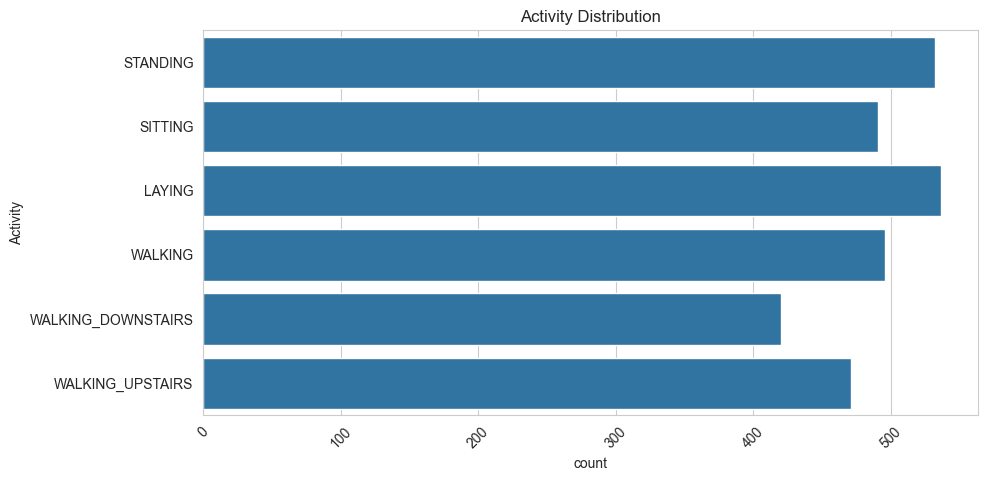

Training set shape: (2062, 561)
Test set shape: (885, 561)


In [8]:
# Separate features and target
X = df.drop(['subject', 'Activity'], axis=1)
y = df['Activity']

# Check class distribution
plt.figure(figsize=(10,5))
sns.countplot(y)
plt.title('Activity Distribution')
plt.xticks(rotation=45)
plt.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

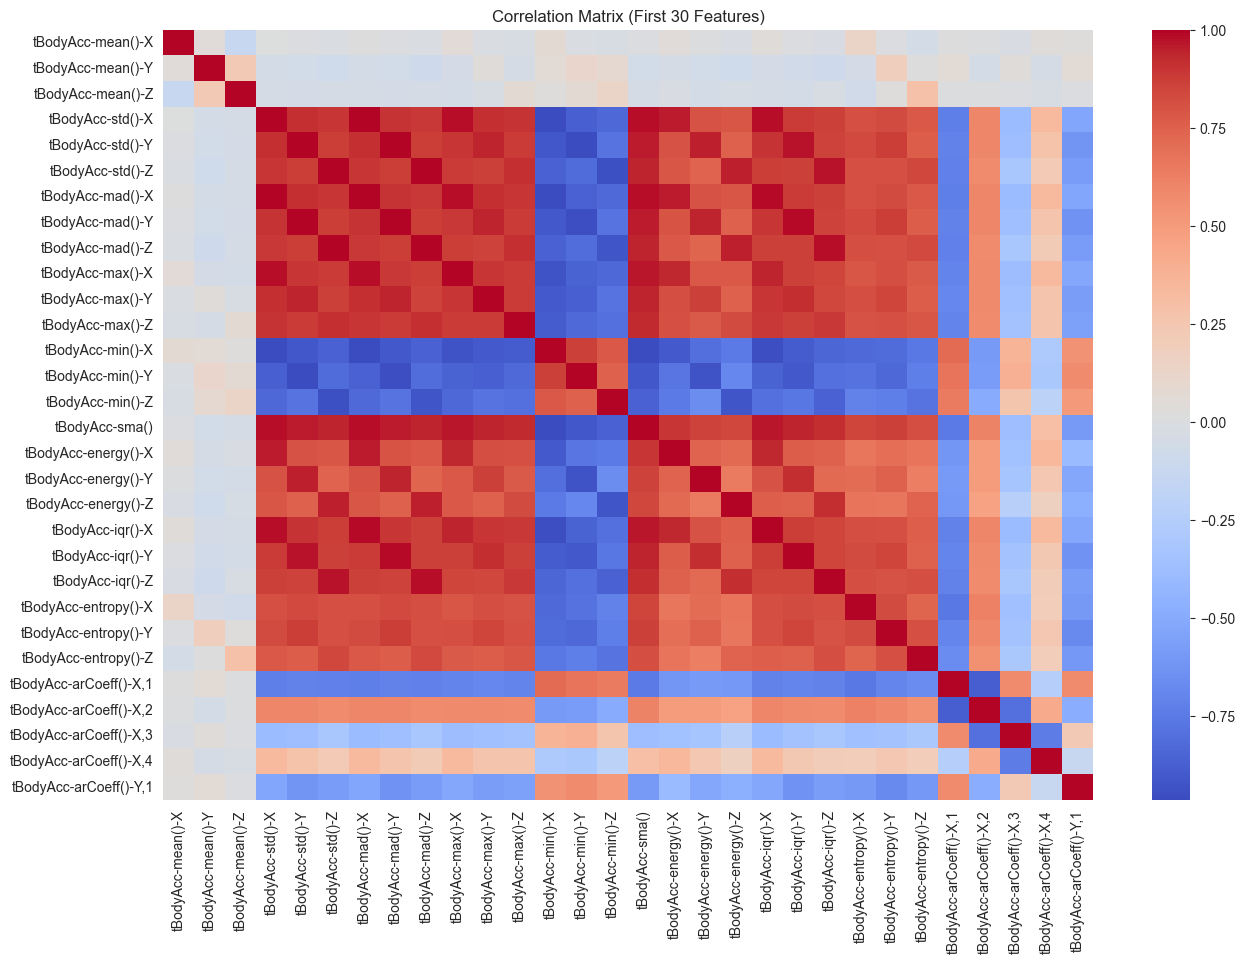

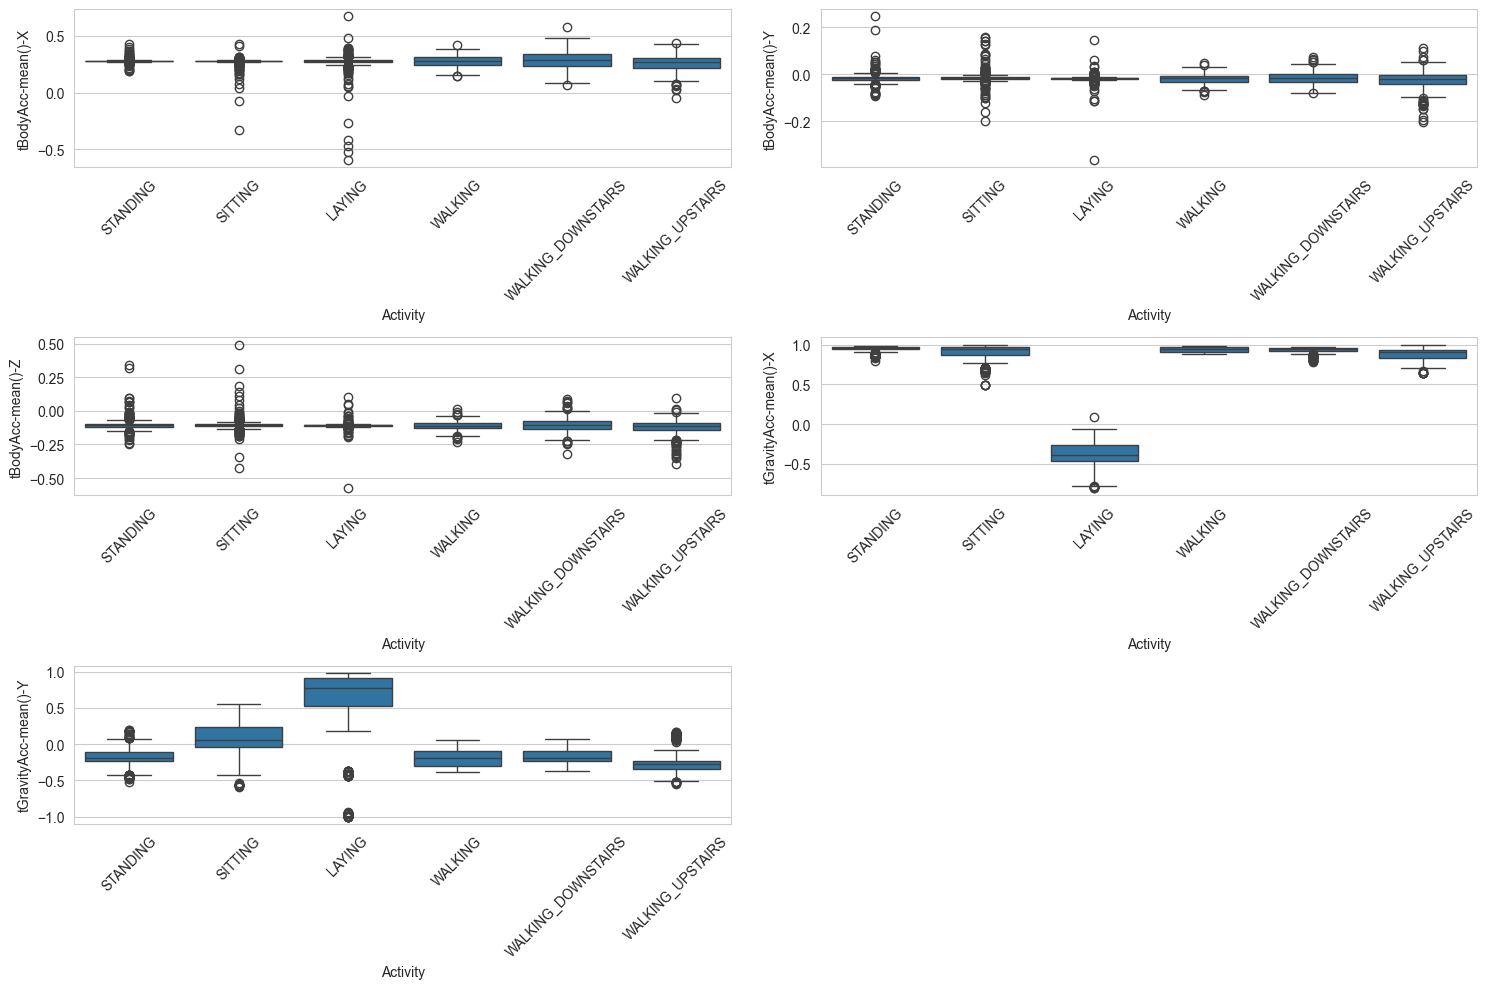

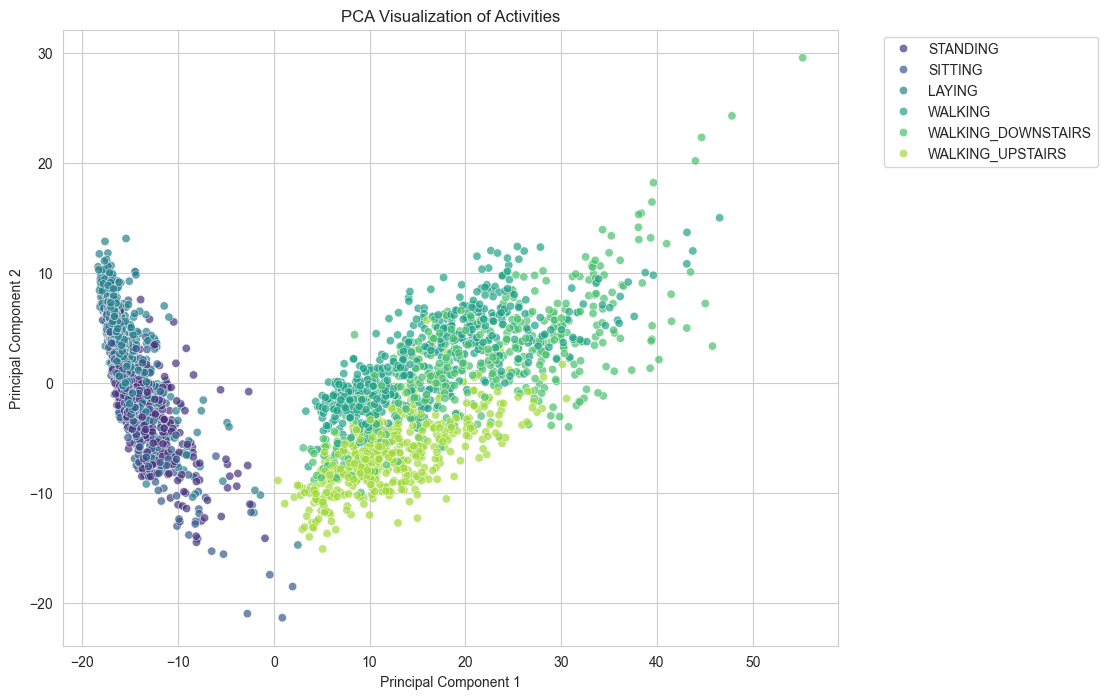

In [10]:
# Plot correlation matrix (first 30 features for visibility)
plt.figure(figsize=(15,10))
sns.heatmap(X.iloc[:, :30].corr(), cmap='coolwarm')
plt.title('Correlation Matrix (First 30 Features)')
plt.show()

# Plot distribution of some key features
plt.figure(figsize=(15,10))
for i, col in enumerate(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 
                         'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Activity', y=col, data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

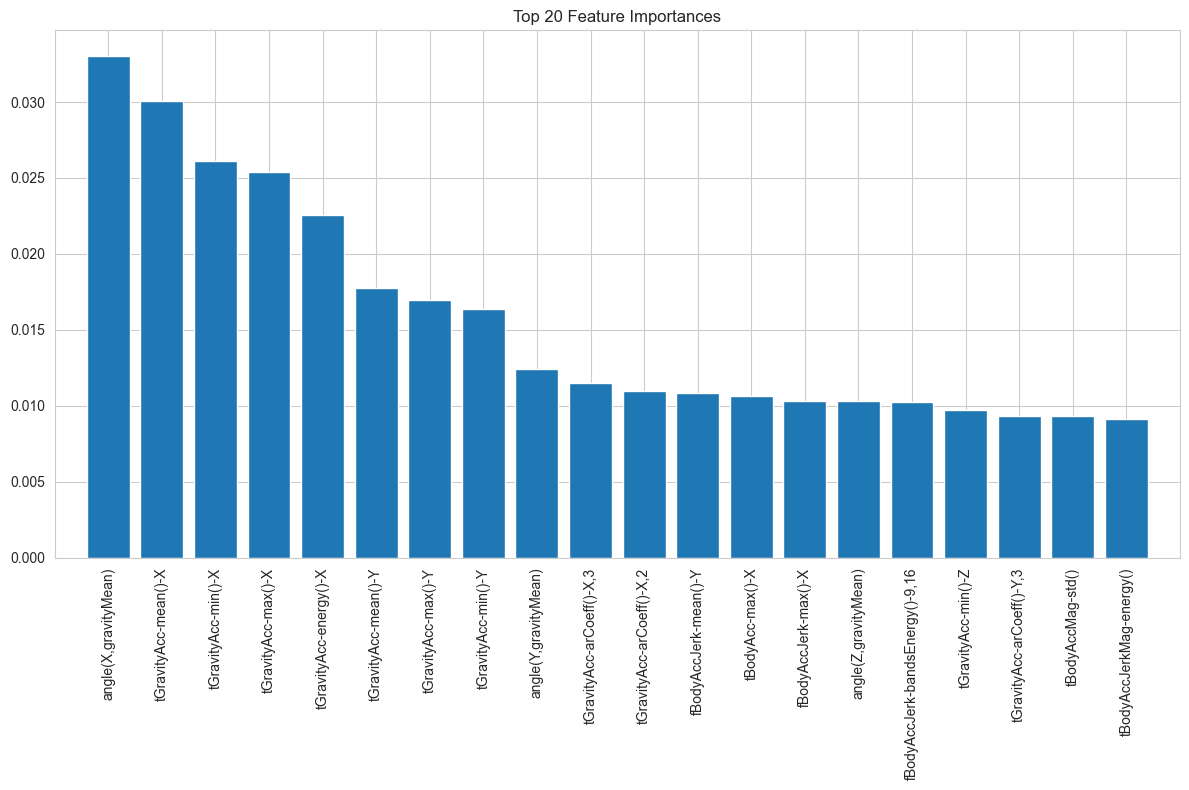

In [11]:
# Train a Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 20 important features
plt.figure(figsize=(12,8))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), X.columns[indices[:20]], rotation=90)
plt.xlim([-1, 20])
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'pca__n_components': 150, 'rf__max_depth': None, 'rf__n_estimators': 200}
Best cross-validation score: 0.94

Test Accuracy: 0.94

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       161
           SITTING       0.92      0.87      0.90       148
          STANDING       0.90      0.93      0.92       160
           WALKING       0.96      0.98      0.97       149
WALKING_DOWNSTAIRS       0.97      0.90      0.93       126
  WALKING_UPSTAIRS       0.93      0.97      0.95       141

          accuracy                           0.94       885
         macro avg       0.94      0.94      0.94       885
      weighted avg       0.94      0.94      0.94       885



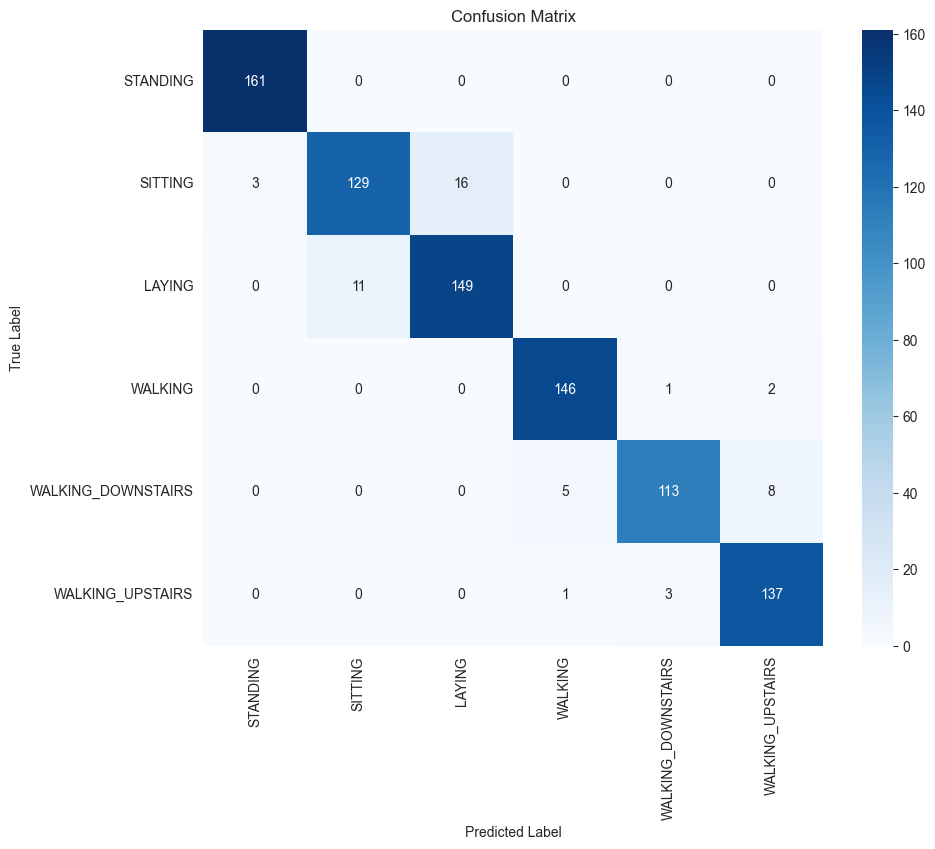

In [12]:
# Create a pipeline with PCA and Random Forest
pipeline = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'pca__n_components': [50, 100, 150],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print("\nTest Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

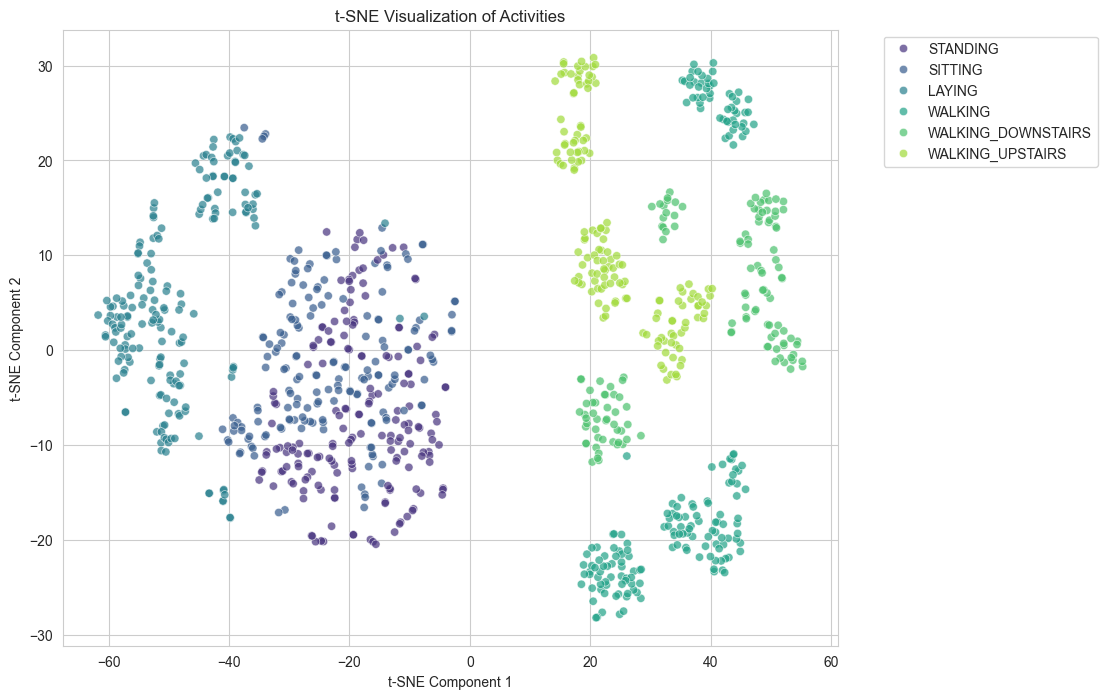

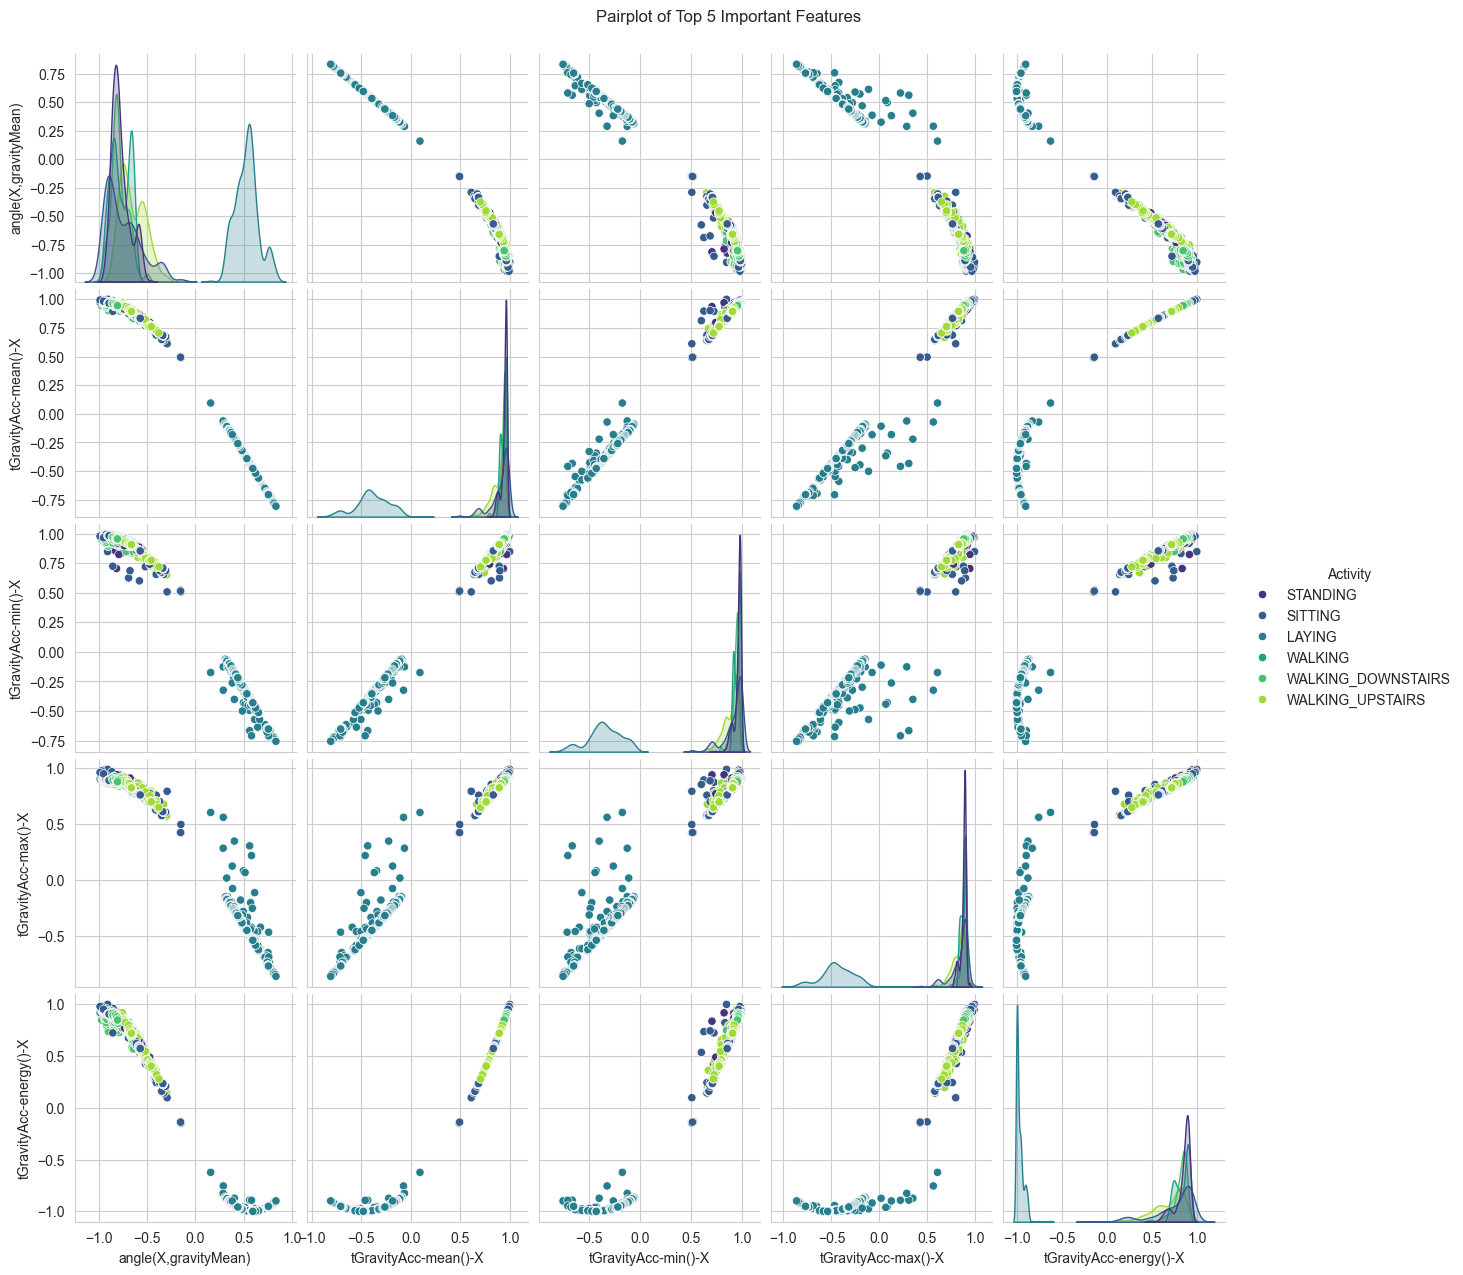

In [13]:
# t-SNE for better visualization (non-linear dimensionality reduction)
from sklearn.manifold import TSNE

# Use a subset of data for faster computation
X_tsne = X_scaled[:1000]
y_tsne = y[:1000]

tsne = TSNE(n_components=2, random_state=42)
X_tsne_embedded = tsne.fit_transform(X_tsne)

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_tsne_embedded[:,0], y=X_tsne_embedded[:,1], 
                hue=y_tsne, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Activities')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Pairplot of top 5 important features
top_features = X.columns[indices[:5]]
sns.pairplot(df[[*top_features, 'Activity']], hue='Activity', palette='viridis')
plt.suptitle('Pairplot of Top 5 Important Features', y=1.02)
plt.show()

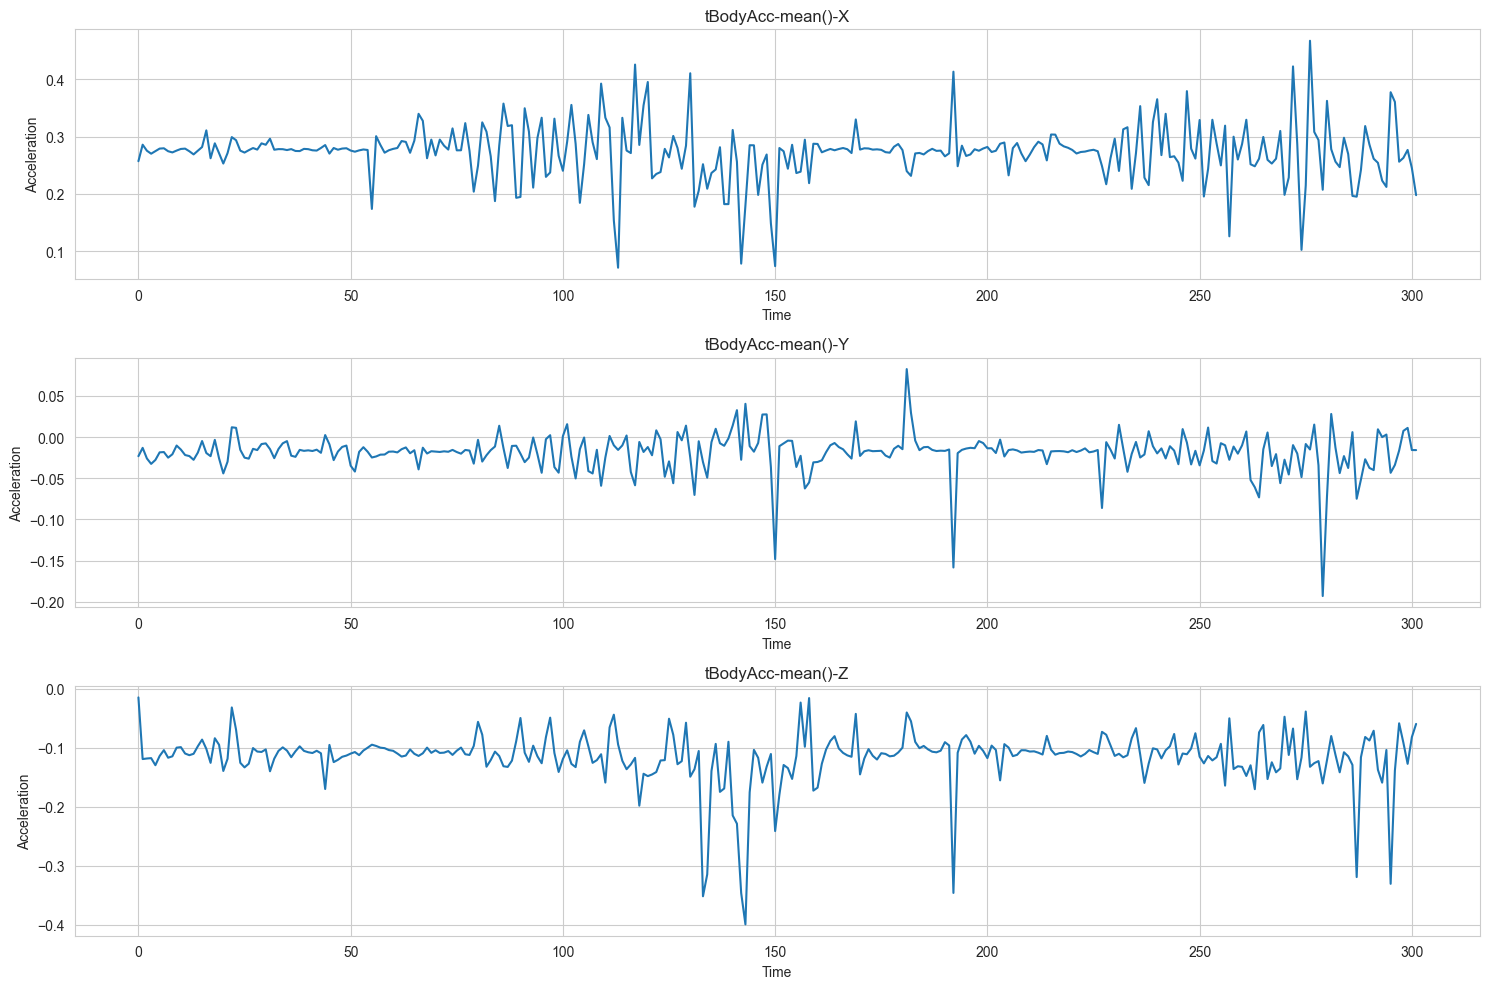

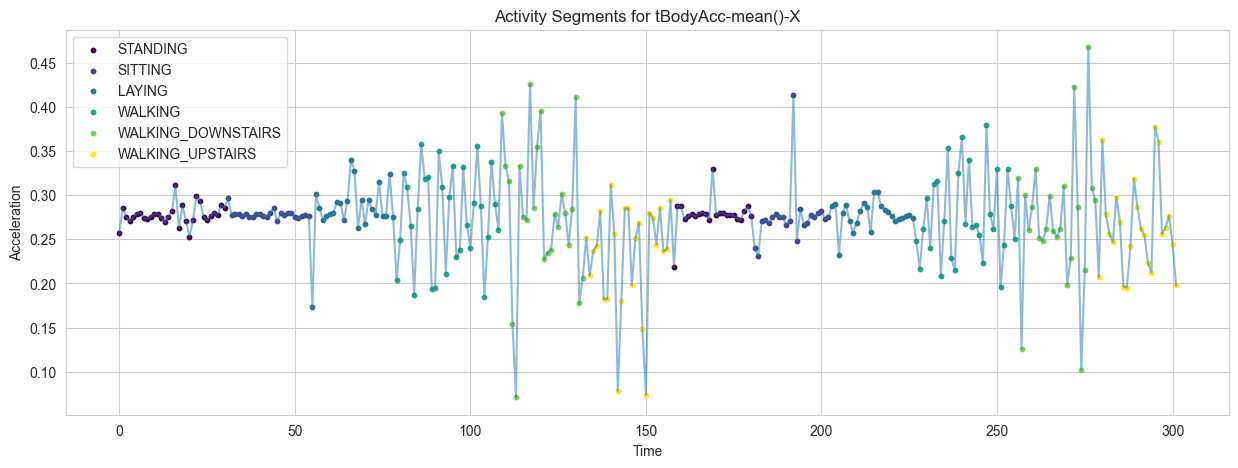

In [14]:
# Select a subject and plot time series for some features
subject_df = df[df['subject'] == 2]  # Using subject 2 as example

plt.figure(figsize=(15,10))
for i, col in enumerate(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']):
    plt.subplot(3, 1, i+1)
    plt.plot(subject_df[col])
    plt.title(col)
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
plt.tight_layout()
plt.show()

# Plot activity segments
activities = subject_df['Activity'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(activities)))

plt.figure(figsize=(15,5))
plt.plot(subject_df['tBodyAcc-mean()-X'], alpha=0.5)
for i, activity in enumerate(activities):
    activity_segments = subject_df[subject_df['Activity'] == activity]
    plt.scatter(activity_segments.index, activity_segments['tBodyAcc-mean()-X'], 
                color=colors[i], label=activity, s=10)
plt.title('Activity Segments for tBodyAcc-mean()-X')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [15]:
# Install shap if not available
# !pip install shap

import shap

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_model.named_steps['rf'])

# Calculate SHAP values (using a subset of data for performance)
X_train_pca = best_model.named_steps['pca'].transform(X_train[:1000])
shap_values = explainer.shap_values(X_train_pca)

# Summary plot
plt.figure()
shap.summary_plot(shap_values, X_train_pca, 
                 feature_names=[f"PC{i+1}" for i in range(X_train_pca.shape[1])], 
                 class_names=best_model.classes_, plot_type="bar")
plt.title('SHAP Feature Importance')
plt.show()

# Force plot for a single prediction
shap.initjs()
sample_idx = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx,:], 
                X_train_pca[sample_idx,:], 
                feature_names=[f"PC{i+1}" for i in range(X_train_pca.shape[1])], 
                matplotlib=True)
plt.title(f'SHAP Explanation for Prediction: {y_train.iloc[sample_idx]}')
plt.show()

ModuleNotFoundError: No module named 'shap'

In [16]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'har_model.pkl')

# Save predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('har_predictions.csv', index=False)

print("Model and predictions saved successfully.")

Model and predictions saved successfully.


In [17]:
# Print final summary
print("HUMAN ACTIVITY RECOGNITION ANALYSIS SUMMARY")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Number of activities: {len(y.unique())}")
print(f"Best model: {type(grid_search.best_estimator_.named_steps['rf']).__name__}")
print(f"Best accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nTop 5 important features:")
for i, idx in enumerate(indices[:5]):
    print(f"{i+1}. {X.columns[idx]}")

print("\nNext steps:")
print("- Collect more data for better generalization")
print("- Experiment with deep learning models (LSTM, CNN)")
print("- Deploy model as a mobile application")
print("- Explore real-time activity recognition")

HUMAN ACTIVITY RECOGNITION ANALYSIS SUMMARY
Dataset shape: (2947, 563)
Number of activities: 6
Best model: RandomForestClassifier
Best accuracy: 0.9435

Top 5 important features:
1. angle(X,gravityMean)
2. tGravityAcc-mean()-X
3. tGravityAcc-min()-X
4. tGravityAcc-max()-X
5. tGravityAcc-energy()-X

Next steps:
- Collect more data for better generalization
- Experiment with deep learning models (LSTM, CNN)
- Deploy model as a mobile application
- Explore real-time activity recognition
